### MARYAM MAJID
### Roll no. BSDSF23M033

### Import Libraries

In [103]:
import numpy as np
import pandas as pd
import time 

### Load Dataset

In [104]:
###Load data here###
data= pd.read_csv("data1.csv")

### Visualize Data

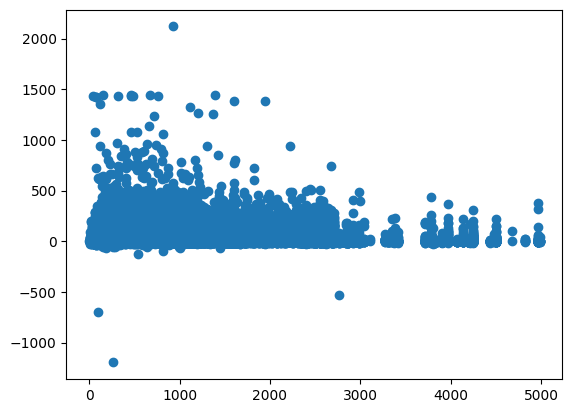

In [105]:
##Run this cell to visualize the data###
import matplotlib.pyplot as plt

plt.scatter(x=data.Distance.values, y=data.DepDelay.values)
plt.show()

### Check for Missing Values

In [106]:
###Check for Missing Data###
data.isnull().sum()

DepDelay      0
Month         0
DayofMonth    0
DayOfWeek     0
CRSDepTime    0
CRSArrTime    0
Distance      0
dtype: int64

In [107]:
data.dtypes

DepDelay      float64
Month         float64
DayofMonth    float64
DayOfWeek     float64
CRSDepTime    float64
CRSArrTime    float64
Distance      float64
dtype: object

### Perform Minmax Scaling

In [108]:
def minmax_scaling (data, column):
    min = data[column].min()
    max = data[column].max()
    return (data[column] - min) / (max - min)

In [109]:
###Apply above function on appropriate columns###
data['DepDelay'] = minmax_scaling(data, 'DepDelay')
data['Month'] = minmax_scaling(data, 'Month')
data['DayofMonth'] = minmax_scaling(data, 'DayofMonth')
data['DayOfWeek'] = minmax_scaling(data, 'DayOfWeek')
data['CRSDepTime'] = minmax_scaling(data, 'CRSDepTime')
data['CRSArrTime'] = minmax_scaling(data, 'CRSArrTime')
data['Distance'] = minmax_scaling(data, 'Distance')
data

,DepDelay,Month,DayofMonth,DayOfWeek,CRSDepTime,CRSArrTime,Distance
0,0.363390,0.818182,0.333333,1.000000,0.541667,0.639583,0.512944
1,0.360072,0.818182,0.300000,0.833333,0.847917,0.879167,0.020068
2,0.362786,0.818182,0.833333,0.000000,0.500000,0.602500,0.496689
3,0.361279,0.818182,0.266667,0.666667,0.477083,0.630000,0.518964
4,0.360977,0.818182,0.500000,0.666667,0.387500,0.478750,0.481437
...,...,...,...,...,...,...,...
999995,0.360676,0.545455,0.966667,0.166667,0.347917,0.391667,0.063616
999996,0.361279,0.545455,0.933333,0.000000,0.510417,0.680417,0.169175
999997,0.360374,0.545455,0.966667,0.166667,0.631250,0.722917,0.070239
999998,0.363390,0.545455,0.800000,0.500000,0.556250,0.685833,0.180614


### Divide Data into Training and Testing

In [110]:
def train_test_split (data, ratio):
    indices = np.random.permutation(data.shape[0])
    test_set_size = int(data.shape[0] * ratio)
    test_indices = indices[:test_set_size]
    train_indices = indices[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]

In [111]:
###Understand the above function and divide data into X_train, X_test, y_train, y_test###
train_data, test_data = train_test_split(data, 0.3) # 70% train , 30% test

### Calculate Weights Using the Normal Equation Method (Matrix Algebra)

In [112]:
###Use the np.linalg.inv function to compute the weight vector/array theta (Hint: @ operator in numpy)###
###You will be required to extract numpy arrays from the DataFrame (Hint: column_name.values)###
###Also, you need to reshape the arrays and merge them to create a multi-dimensional
###array in numpy, similar to a Pandas DataFrame (Hint: np.hstack)
###A bias vector/column is also required as a column in our stacked array (Hint: np.ones)###
X_train = train_data[['Month','DayofMonth','DayOfWeek','CRSDepTime','CRSArrTime','Distance']].values
y_train = train_data[['DepDelay']].values.reshape(-1, 1)
X_test = test_data[['Month','DayofMonth','DayOfWeek','CRSDepTime','CRSArrTime','Distance']].values
y_test = test_data[['DepDelay']].values.reshape(-1, 1)

X_train = np.hstack((np.ones((X_train.shape[0], 1)), X_train))
X_test = np.hstack((np.ones((X_test.shape[0], 1)), X_test))

theta = np.linalg.inv(X_train.T @ X_train) @ X_train.T @ y_train



### Calculate Predictions on Test Set

In [113]:
###Calculate predictions on X_test using theta###
y_pred = X_test @ theta
print(y_pred)


[[0.36251642]
 [0.36347436]
 [0.36481104]
 ...
 [0.36417003]
 [0.36256205]
 [0.3639671 ]]


### Calculate MSE (Evaluate Model)

In [114]:
###Evaluate the regression model based on Mean Squared Error###
mse = np.mean((y_pred - y_test) ** 2)
print("MSE (Normal Equation):", mse)

MSE (Normal Equation): 7.680393484010323e-05


### Inverse Transform Model's Output

In [115]:
###Transform model's output back to original range/scale###

dis_min = data['DepDelay'].min()
dis_max = data['DepDelay'].max()  

y_pred_original = y_pred * (dis_max - dis_min) + dis_min
print("Inverse Transformed Predictions:", y_pred_original)

Inverse Transformed Predictions: [[0.36251642]
 [0.36347436]
 [0.36481104]
 ...
 [0.36417003]
 [0.36256205]
 [0.3639671 ]]


### Calcualte Weights Using Gradient Descent

In [116]:
###Implement Batch GD to compute the weight vector theta###

start_time = time.time()
theta0, theta1, theta2, theta3,theta4, theta5,theta6 = 0, 0, 0, 0, 0, 0,0
alpha = 0.01
epochs = 100


for i in range(epochs):
    ###Implement GD###
    x1 = X_train[:, 0]  # Only Month
    x2 = X_train[:, 1]  # only  DayofMonth
    x3 = X_train[:, 2]  # for  DayOfWeek
    x4 = X_train[:, 3]  # for  CRSDepTime
    x5 = X_train[:, 4]  # for  CRSArrTime
    x6 = X_train[:, 5]  # for  Distance
    y_pred = theta0 + theta1 * x1 + theta2 * x2 + theta3 * x3 + theta4 * x4 + theta5 * x5 + theta6 * x6
    error = y_pred.reshape(-1, 1) - y_train

    grad0 = (1 / len(X_train)) * np.sum(error)
    grad1 = (1 / len(X_train)) * np.sum(error.flatten() * x1) #error is 2d and x1 is 1d
    grad2 = (1 / len(X_train)) * np.sum(error.flatten() * x2)
    grad3 = (1 / len(X_train)) * np.sum(error.flatten() * x3)
    grad4 = (1 / len(X_train)) * np.sum(error.flatten() * x4)
    grad5 = (1 / len(X_train)) * np.sum(error.flatten() * x5)
    grad6 = (1 / len(X_train)) * np.sum(error.flatten() * x6)

    theta0 -= alpha * grad0
    theta1 -= alpha * grad1
    theta2 -= alpha * grad2
    theta3 -= alpha * grad3
    theta4 -= alpha * grad4
    theta5 -= alpha * grad5
    theta6 -= alpha * grad6

theta_gd = np.vstack((theta0, theta1,theta2,theta3,theta4,theta5,theta6))
end_time = time.time()
time_bgd = end_time - start_time
print(theta_gd)

[[0.104493  ]
 [0.104493  ]
 [0.04866978]
 [0.04814739]
 [0.04726888]
 [0.0551347 ]
 [0.06191178]]


### Calculate Predictions on Test Test

In [117]:
###Calculate y_pred on weights from GD###
y_pred_gd = X_test @ theta_gd


### Calculate MSE (Evaluate Model)

In [118]:
###Calculate MSE on y_pred from GD###
mse_gd = np.mean((y_pred_gd - y_test) ** 2)
print("MSE (Gradient Descent):", mse_gd)

MSE (Gradient Descent): 0.010073654983348905


### Compare the two Approaches based on MSE ###

In [119]:
###Which approach is more accurate?###
###Which approach is fast###?
if mse < mse_gd:
    print("Normal Equation performed better (lower MSE).")
elif mse > mse_gd:
    print("Gradient Descent performed better (lower MSE).")
else:
    print(" Both approaches performed equally well.")

Normal Equation performed better (lower MSE).


### Stochastic Gradient Descent

In [ ]:
start_time = time.time()
theta = np.zeros(7)
alpha = 0.01
epochs = 100

# Run SGD
for epoch in range(epochs):
    for i in range(len(X_train)):
        x = X_train[i]          
        y = y_train[i][0]         

        # Prediction and error
        y_pred = np.dot(theta, x)
        error = y_pred - y

        # Update weights
        theta -= alpha * error * x

    # Optional: print MSE every 10 epochs
    if epoch % 10 == 0:
        y_pred_all = X_train @ theta.reshape(-1, 1)
        mse = np.mean((y_pred_all - y_train) ** 2)
        print(f"Epoch {epoch}: MSE = {mse:.5f}")

# Final theta values
theta_sgd = theta.reshape(-1, 1)
print("Stochastic GD Final Weights:\n", theta_sgd)
end_time = time.time()

# Evaluate on test set
y_pred_sgd = X_test @ theta_sgd
mse_sgd = np.mean((y_pred_sgd - y_test) ** 2)
time_sgd = end_time - start_time
print("MSE (Stochastic Gradient Descent):", mse_sgd)

Epoch 0: MSE = 0.00007
Epoch 10: MSE = 0.00007
Epoch 20: MSE = 0.00007
Epoch 30: MSE = 0.00007
Epoch 40: MSE = 0.00007
Epoch 50: MSE = 0.00007
Epoch 60: MSE = 0.00007
Epoch 70: MSE = 0.00007
Epoch 80: MSE = 0.00007
Epoch 90: MSE = 0.00007
Stochastic GD Final Weights:
 [[ 0.35984994]
 [-0.00113017]
 [ 0.0004501 ]
 [ 0.00052582]
 [ 0.00275896]
 [ 0.0019154 ]
 [ 0.00143579]]
MSE (Stochastic Gradient Descent): 7.754467443608046e-05


In [123]:
#Comparing the performancein terms of time taken, compare the weights and MSE of both models.
print(f"Batch GD         - MSE: {mse_gd:.5f}, Time: {time_bgd:.5f}s")
print(f"Stochastic GD    - MSE: {mse_sgd:.5f}, Time: {time_sgd:.5f}s")
print("Batch GD Weights:\n", theta_gd)
print("Stochastic GD Weights:\n", theta_sgd)

Batch GD         - MSE: 0.01007, Time: 10.49332s
Stochastic GD    - MSE: 0.00008, Time: 530.32870s
Batch GD Weights:
 [[0.104493  ]
 [0.104493  ]
 [0.04866978]
 [0.04814739]
 [0.04726888]
 [0.0551347 ]
 [0.06191178]]
Stochastic GD Weights:
 [[ 0.35984994]
 [-0.00113017]
 [ 0.0004501 ]
 [ 0.00052582]
 [ 0.00275896]
 [ 0.0019154 ]
 [ 0.00143579]]
